### Neural Nets (Basic from scratch, keras, tf) and CNN's on Mnist Fashion Data

### bdh2141

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pprint 
pp = pprint.PrettyPrinter(indent=4)

### Feed forward network from scratch!

Implement the forward pass and backward pass

In [2]:
np.random.seed(0)

weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation
    
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [5]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    
    dLdb2 = np.sum(dLdZ2, axis=0)
    dZ2dH = weights['W2'].reshape(3, 1).T
    dLdH = np.multiply(dLdZ2.reshape(1000, 1), dZ2dH)
    dLdZ1 = np.multiply(dLdH, (sigmoid(Z1)*(1-sigmoid(Z1))))
    dLdW1 = np.dot(X.T, dLdZ1)
    dLdb1 = np.sum(dLdZ1, axis=0)
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L

In [6]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [7]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596, -0.00030765, -0.00034768],
       [ 0.00262019, -0.00024188, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


### Fashion MNIST dataset

The Fashion-MNIST dataset is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. More about the dataset: [Fashion-MNIST homepage](https://github.com/zalandoresearch/fashion-mnist). 

Utilizing tensorflow for the following:

In [8]:
from tensorflow.keras.datasets import fashion_mnist

# load data
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

**Plot the first 25 samples from both development and test sets**

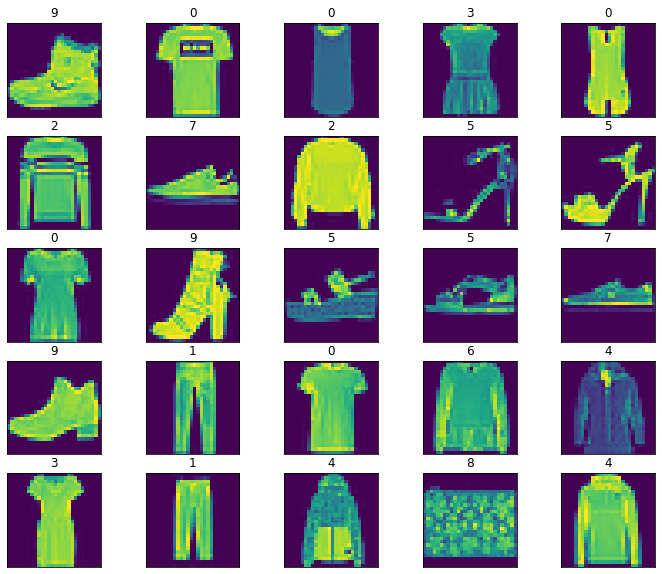

In [9]:
fig, ax = plt.subplots(5, 5, figsize=(12, 10))
for i in range(25):
    row = i // 5
    col = i % 5
    ax[row, col].imshow(xdev[i])
    ax[row, col].set_title(ydev[i])
    ax[row, col].tick_params(left=False,
                 bottom=False,
                 labelleft=False,
                 labelbottom=False)
plt.show()

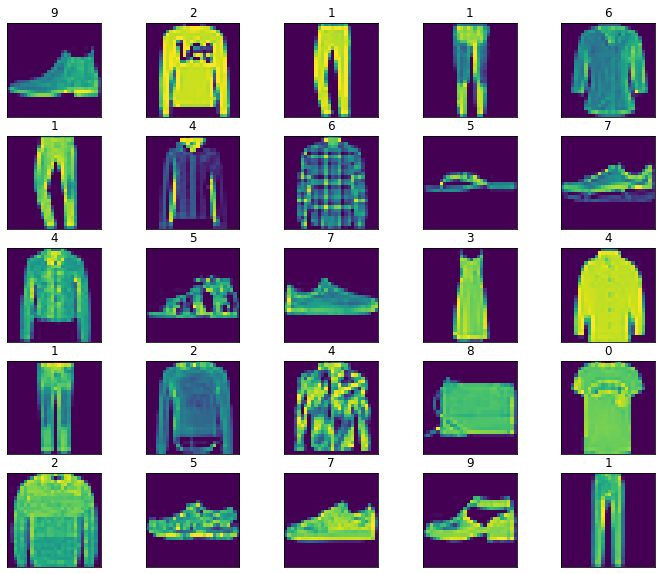

In [10]:
fig, ax = plt.subplots(5, 5, figsize=(12, 10))
for i in range(25):
    row = i // 5
    col = i % 5
    ax[row, col].imshow(xtest[i])
    ax[row, col].set_title(ytest[i])
    ax[row, col].tick_params(left=False,
                 bottom=False,
                 labelleft=False,
                 labelbottom=False)
plt.show()

### Feed Forward Network

Print their shapes - $x_\text{dev}, y_{\text{dev}}, x_\text{test}, y_\text{test}$

In [11]:
print(f'Development feature shape: {xdev.shape}, Development label shape: {ydev.shape}')
print(f'Development feature shape: {xtest.shape}, Development label shape: {ytest.shape}')

Development feature shape: (60000, 28, 28), Development label shape: (60000,)
Development feature shape: (10000, 28, 28), Development label shape: (10000,)


**Flatten the images into one-dimensional vectors. Again, print out the shapes of $x_\text{dev}, x_\text{test}$**

In [12]:
xdev_flat = np.array([xi.flatten() for xi in xdev])
xtest_flat = np.array([xi.flatten() for xi in xtest])
print(f'New development shape: {xdev_flat.shape}, New test shape: {xtest_flat.shape}')

New development shape: (60000, 784), New test shape: (10000, 784)


**Standardize the development and test sets.**

Each pixel takes value from 0 to 255.0. 0 means background (white), 255 means foreground (black).

In [13]:
# retype feature arrays
xdev_flat = xdev_flat.astype('float32')
xtest_flat = xtest_flat.astype('float32')

# divide the arrays by 255 to normalize
xdev_flat /= 255
xtest_flat /= 255

**Justification for encoding the target variable**

I would consider encoding our targets a necessity in a multiclass problem like this. Using softmax, we will receive a 'probability' value for each of our output dimensions, corresponding to the probability of the ith class being the correct label. This creates a necessity to one hot our labels, so we can then calculate our loss using cross-entropy. Cross entropy then allows us to measure the 'strength' of our prediction on the true label and work towards a minimization of loss (where lower loss has higher strength).

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ydev_cat = OneHotEncoder(sparse=False).fit_transform(ydev.reshape(-1, 1))
ytest_cat = OneHotEncoder(sparse=False).fit_transform(ytest.reshape(-1, 1))

print(f'New development label shape: {ydev_cat.shape}, New test label shape: {ytest_cat.shape}')

New development label shape: (60000, 10), New test label shape: (10000, 10)


**Train-test split your development set into train and validation sets (8:2 ratio)**. 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_val, y_train, y_val = train_test_split(xdev_flat, ydev_cat, test_size=0.2)

**Build the feed forward network**

Using Softmax activation for the last layer and ReLU activation for every other layer, build the following model:

1. First hidden layer size - 128
2. Second hidden layer size - 64
3. Third and last layer size - You should know this



In [18]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential([
    Dense(128, input_shape=(784,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

### 3.2.2 Print out the model summary

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


Trainable Prameters: 109386

Number is dependent on height * width (length of input vector)

Model's output on first train sample to confirm dimensions:

In [21]:
output_sample = model.predict(np.array([X_train[0]]))
print(f'Sum of output: {np.around(np.sum(output_sample[0]), 3)}')
print('Confirmed')

Sum of output: 1.0
Confirmed


**Reasoning for categorical cross-entropy:**

Categrorical Cross-Entropy, as it will provide us with a value represented by the strength of some prediction based on the probability of the model choosing the correct label. This goes directly hand in hand with softmax's proability based output. As a evaluation metric, I will choose accuracy, as our predictions highest probability output is either wrong or right, making it a natural choice.

**Train using adam optimizer**

In [22]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=1)

Epoch 1/20
338/338 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7996 - val_loss: 0.4273 - val_accuracy: 0.8448
Epoch 2/20
338/338 [==============================] - 1s 2ms/step - loss: 0.4036 - accuracy: 0.8521 - val_loss: 0.4196 - val_accuracy: 0.8404
Epoch 3/20
338/338 [==============================] - 1s 1ms/step - loss: 0.3747 - accuracy: 0.8635 - val_loss: 0.3757 - val_accuracy: 0.8633
Epoch 4/20
338/338 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.8676 - val_loss: 0.3895 - val_accuracy: 0.8610
Epoch 5/20
338/338 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8746 - val_loss: 0.3923 - val_accuracy: 0.8537
Epoch 6/20
338/338 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8770 - val_loss: 0.3751 - val_accuracy: 0.8677
Epoch 7/20
338/338 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8808 - val_loss: 0.3643 - val_accuracy: 0.8698
Epoch 

**Plot two separate plots displaying train vs validation loss and train vs validation metric scores over each epoch**

In [24]:
import pandas as pd

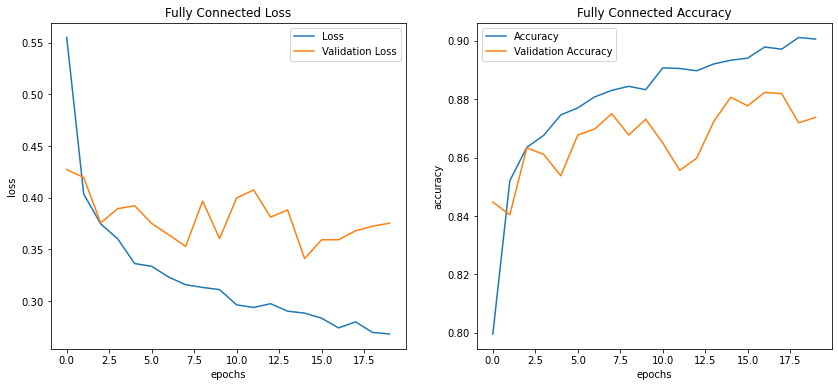

In [81]:
name = 'Fully Connected'
hist_df = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(hist_df.index, hist_df.loss, label='Loss')
ax[0].plot(hist_df.index, hist_df.val_loss, label='Validation Loss')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epochs')
ax[0].set_title(f'{name} Loss')
ax[0].legend()
ax[1].plot(hist_df.index, hist_df.accuracy, label='Accuracy')
ax[1].plot(hist_df.index, hist_df.val_accuracy, label='Validation Accuracy')
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_title(f'{name} Accuracy')
ax[1].legend()
plt.show()

**Report metric score on test set**

In [26]:
preds = np.argmax(model.predict(xtest_flat), axis=1)

In [49]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(ytest, preds)
print('Test Accuracy: {}'.format(acc))

eva = model.evaluate(xtest_flat, ytest_cat)
print('Test Loss: {}'.format(eva[0]))

Test Accuracy: 0.8708
313/313 [==============================] - 0s 595us/step - loss: 0.4004 - accuracy: 0.8708
Test Loss: 0.4004010260105133


**Plot confusion matrix on the test set**

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

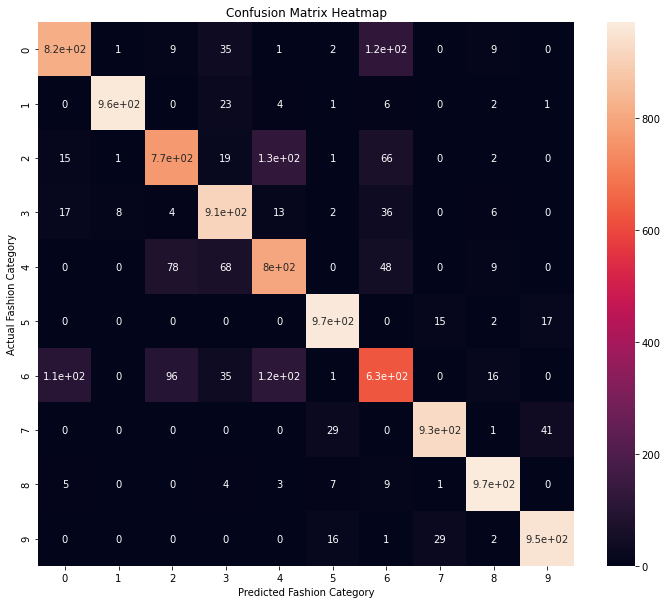

In [29]:
cm = confusion_matrix(ytest, preds)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, annot=True)
ax.set_title('Confusion Matrix Heatmap')
ax.set_xlabel('Predicted Fashion Category')
ax.set_ylabel('Actual Fashion Category')
plt.show()

**Plot the first 25 samples of test dataset**

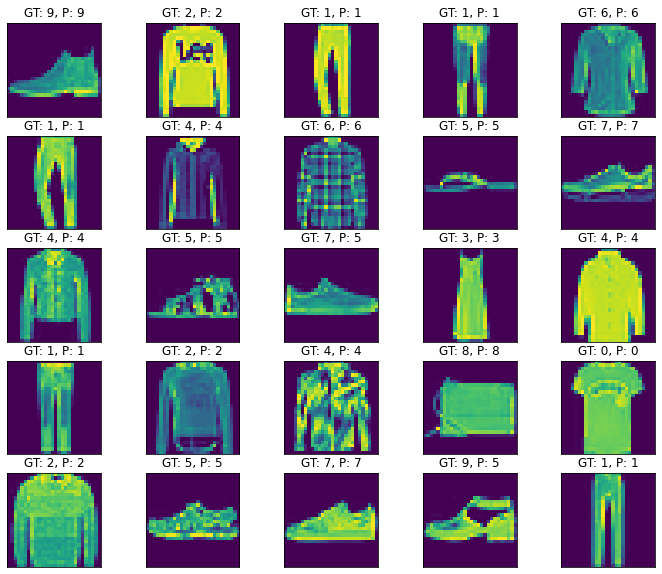

In [30]:
fig, ax = plt.subplots(5, 5, figsize=(12, 10))
for i in range(25):
    row = i // 5
    col = i % 5
    ax[row, col].imshow(xtest[i])
    ax[row, col].set_title(f'GT: {ytest[i]}, P: {preds[i]}')
    ax[row, col].tick_params(left=False,
                 bottom=False,
                 labelleft=False,
                 labelbottom=False)
plt.show()

### Convolutional Neural Network

Build and train a classical convolutional neural network, LeNet-5, on the Fashion-MNIST dataset. 

In [31]:
from tensorflow.keras.datasets import fashion_mnist

# load data again
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

**Preprocess**

1. Standardize the datasets

2. Encode the target variable.

3. Split development set to train and validation sets (8:2).

In [32]:
# retype feature arrays
xdev = xdev.astype('float32')
xtest = xtest.astype('float32')

# divide the arrays by 255 to normalize
xdev /= 255
xtest /= 255

print(f'Shape of development data: {xdev.shape}, Shape of test data: {xtest.shape}')

ydev_cat = OneHotEncoder(sparse=False).fit_transform(ydev.reshape(-1, 1))
ytest_cat = OneHotEncoder(sparse=False).fit_transform(ytest.reshape(-1, 1))

print(f'New development label shape: {ydev_cat.shape}, New test label shape: {ytest_cat.shape}')

Shape of development data: (60000, 28, 28), Shape of test data: (10000, 28, 28)
New development label shape: (60000, 10), New test label shape: (10000, 10)


In [33]:
# train test split
X_train, X_val, y_train, y_val = train_test_split(xdev, ydev_cat, test_size=0.2)

**LeNet-5**

We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1. 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1  padded to yield the same size as input, ReLU activation
2. Maxpooling layer of 2x2
3. 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation 
4. Maxpooling layer of 2x2 
5. 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!
6. A fully connected layer with 84 units, ReLU activation
7. The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [34]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

conv = Sequential()
conv.add(Conv2D(filters=6,
                kernel_size=5,
                strides=1,
                padding='same',
                activation='relu',
                input_shape=(28, 28, 1)
               ))
conv.add(MaxPooling2D(pool_size=(2, 2)))
conv.add(Conv2D(filters=16,
                kernel_size=5,
                strides=1,
                padding='valid',
                activation='relu'
               ))
conv.add(MaxPooling2D(pool_size=(2, 2)))
conv.add(Conv2D(filters=120,
                kernel_size=5,
                activation='relu'
               ))
conv.add(Dense(84, activation='relu'))
conv.add(Dense(10, activation='softmax'))

**Report layer output**

Report the output dimensions of each layers of LeNet-5. **Hint:** You can report them using the model summary function that most frameworks have, or you can calculate and report the output dimensions by hand (It's actually not that hard and it's a good practice too!)

In [35]:
conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 dense_3 (Dense)             (None, 1, 1, 84)         

**Model training**

Train the model for 10 epochs. Plot loss and accuracy and train and validation sets.

In [36]:
opt = keras.optimizers.Adam(learning_rate=0.01)
conv.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

conv_hist = conv.fit(X_train, y_train.reshape(len(y_train), 1, 1, 10), batch_size=128, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
338/338 [==============================] - 5s 14ms/step - loss: 0.5327 - accuracy: 0.8029 - val_loss: 0.3341 - val_accuracy: 0.8777
Epoch 2/10
338/338 [==============================] - 5s 14ms/step - loss: 0.3452 - accuracy: 0.8708 - val_loss: 0.3108 - val_accuracy: 0.8833
Epoch 3/10
338/338 [==============================] - 5s 14ms/step - loss: 0.3096 - accuracy: 0.8850 - val_loss: 0.3066 - val_accuracy: 0.8898
Epoch 4/10
338/338 [==============================] - 5s 14ms/step - loss: 0.2858 - accuracy: 0.8938 - val_loss: 0.3016 - val_accuracy: 0.8867
Epoch 5/10
338/338 [==============================] - 5s 14ms/step - loss: 0.2773 - accuracy: 0.8969 - val_loss: 0.2960 - val_accuracy: 0.8940
Epoch 6/10
338/338 [==============================] - 5s 14ms/step - loss: 0.2619 - accuracy: 0.9022 - val_loss: 0.3189 - val_accuracy: 0.8808
Epoch 7/10
338/338 [==============================] - 5s 14ms/step - loss: 0.2610 - accuracy: 0.9020 - val_loss: 0.3171 - val_accuracy: 0.8860

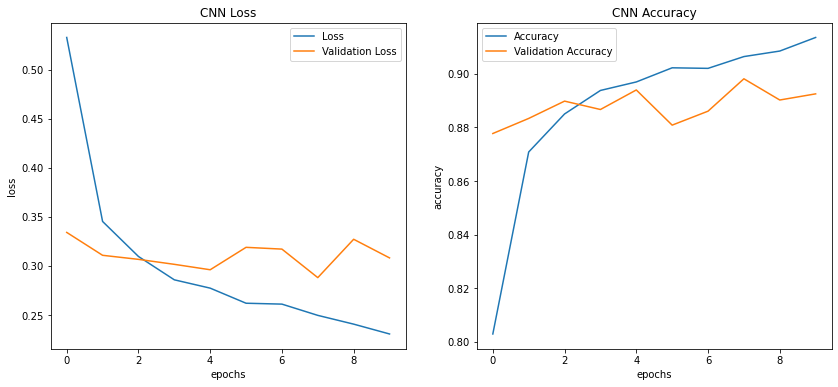

In [80]:
name = 'CNN'
hist_df = pd.DataFrame(conv_hist.history)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(hist_df.index, hist_df.loss, label='Loss')
ax[0].plot(hist_df.index, hist_df.val_loss, label='Validation Loss')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epochs')
ax[0].set_title(f'{name} Loss')
ax[0].legend()
ax[1].plot(hist_df.index, hist_df.accuracy, label='Accuracy')
ax[1].plot(hist_df.index, hist_df.val_accuracy, label='Validation Accuracy')
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_title(f'{name} Accuracy')
ax[1].legend()
plt.show()

In [38]:
# TODO: Report model performance on test set
model_performance = conv.evaluate(xtest, ytest_cat.reshape(len(ytest_cat), 1, 1, 10))
print(f'Test Crossentropy Loss: {model_performance[0]}, Test Accuracy: {model_performance[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8878
Test Crossentropy Loss: 0.34755852818489075, Test Accuracy: 0.8877999782562256


The plots do show some signs of overfitting, as indicated by the disparity between the train vs validation accuracy and loss values. Another strong indicator of overfitting here is how the validation loss increases with our epochs trained after a certain point. This leads directly into the most common efforts to combat overfitting, such as **batch normalization, dropout** and even simpler methods like **early stopping**.

**Report metric score on test set**

In [50]:
print(f'Test Crossentropy Loss: {model_performance[0]}, Test Accuracy: {model_performance[1]}')

Test Crossentropy Loss: 0.34755852818489075, Test Accuracy: 0.8877999782562256


**Test for Overfitting**

Using drop-out

In [59]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [73]:
conv2 = Sequential()
conv2.add(Conv2D(filters=6,
                kernel_size=5,
                strides=1,
                padding='same',
                activation='relu',
                input_shape=(28, 28, 1)
               ))
# conv2.add(Dropout(0.5))
conv2.add(MaxPooling2D(pool_size=(2, 2)))
conv2.add(Conv2D(filters=16,
                kernel_size=5,
                strides=1,
                padding='valid',
                activation='relu'
               ))
# conv2.add(Dropout(0.5))
conv2.add(MaxPooling2D(pool_size=(2, 2)))
conv2.add(Conv2D(filters=120,
                kernel_size=5,
                activation='relu'
               ))
conv2.add(Dropout(0.5))
conv2.add(Dense(84, activation='relu'))
conv2.add(Dropout(0.5))
conv2.add(Dense(10, activation='softmax'))

conv2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 dropout_11 (Dropout)        (None, 1, 1, 120)        

In [74]:
opt = keras.optimizers.Adam(learning_rate=0.01)
conv2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

conv2_hist = conv2.fit(X_train, y_train.reshape(len(y_train), 1, 1, 10), batch_size=128, epochs=15, verbose=1, validation_split=0.1)

Epoch 1/15
338/338 [==============================] - 6s 17ms/step - loss: 0.7640 - accuracy: 0.7164 - val_loss: 0.4336 - val_accuracy: 0.8448
Epoch 2/15
338/338 [==============================] - 5s 15ms/step - loss: 0.5437 - accuracy: 0.8084 - val_loss: 0.3720 - val_accuracy: 0.8623
Epoch 3/15
338/338 [==============================] - 5s 15ms/step - loss: 0.5114 - accuracy: 0.8224 - val_loss: 0.3697 - val_accuracy: 0.8633
Epoch 4/15
338/338 [==============================] - 5s 15ms/step - loss: 0.4896 - accuracy: 0.8313 - val_loss: 0.3791 - val_accuracy: 0.8575
Epoch 5/15
338/338 [==============================] - 5s 15ms/step - loss: 0.4804 - accuracy: 0.8357 - val_loss: 0.3700 - val_accuracy: 0.8646
Epoch 6/15
338/338 [==============================] - 5s 15ms/step - loss: 0.4695 - accuracy: 0.8405 - val_loss: 0.4065 - val_accuracy: 0.8417
Epoch 7/15
338/338 [==============================] - 5s 15ms/step - loss: 0.4787 - accuracy: 0.8382 - val_loss: 0.3461 - val_accuracy: 0.8777

**Dropout between last convolutional layer and dense layers**

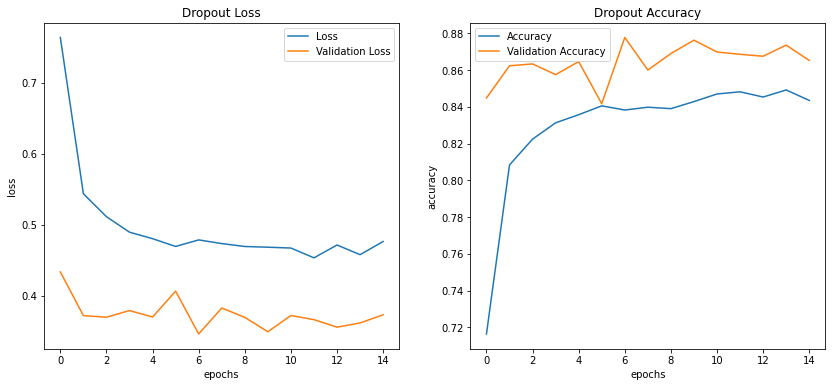

In [79]:
name = 'Dropout'
hist_df = pd.DataFrame(conv2_hist.history)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(hist_df.index, hist_df.loss, label='Loss')
ax[0].plot(hist_df.index, hist_df.val_loss, label='Validation Loss')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epochs')
ax[0].set_title(f'{name} Loss')
ax[0].legend()
ax[1].plot(hist_df.index, hist_df.accuracy, label='Accuracy')
ax[1].plot(hist_df.index, hist_df.val_accuracy, label='Validation Accuracy')
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_title(f'{name} Accuracy')
ax[1].legend()
plt.show()

In [55]:
model_performance = conv2.evaluate(xtest, ytest_cat.reshape(len(ytest_cat), 1, 1, 10))
print(f'Test Crossentropy Loss: {model_performance[0]}, Test Accuracy: {model_performance[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.8713
Test Crossentropy Loss: 0.38384827971458435, Test Accuracy: 0.8712999820709229


**Observations:**
After adding the dropout layer, we are seeing much less disparity between the validation loss and accuracy in comparison to the train loss and accuracy, respectively. This is a sign that the model may not be as overfit as the model above, even though its test accuracy was a little lower and loss a little higher. There then becomes a tradeoff on what the architecht wants to deploy, as a model that may be more generalized to future samples may be more beneficial even though it does score slightly less high on the test dataset.

Note: I have read online about the lack of benefit when using dropout between convolutional layers ([here](https://www.kdnuggets.com/2018/09/dropout-convolutional-networks.html?msclkid=56f2a332bfe911ec9e874ad0bc575d3f)), and with that knowledge I based the above answer on my last two graphs shown above, where overfitting is clearly reduced to a manageable form while also holding on to validation performance at a level close to the non dropout models. To quote the article above, "If you were wondering whether you should implement dropout in a convolutional network, now you know. Only use dropout on fully-connected layers, and implement batch normalization between convolutions."

**Batch Normalization**

In [66]:
conv3 = Sequential()
conv3.add(Conv2D(filters=6,
                kernel_size=5,
                strides=1,
                padding='same',
                activation='relu',
                input_shape=(28, 28, 1)
               ))
conv3.add(BatchNormalization())
conv3.add(MaxPooling2D(pool_size=(2, 2)))
conv3.add(Conv2D(filters=16,
                kernel_size=5,
                strides=1,
                padding='valid',
                activation='relu'
               ))
conv3.add(BatchNormalization())
conv3.add(MaxPooling2D(pool_size=(2, 2)))
conv3.add(Conv2D(filters=120,
                kernel_size=5,
                activation='relu'
               ))
conv3.add(BatchNormalization())
conv3.add(Dense(84, activation='relu'))
conv3.add(BatchNormalization())
conv3.add(Dense(10, activation='softmax'))

conv3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 6)        24        
 ormalization)                                                   
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 batch_normalization_1 (Batc  (None, 10, 10, 16)       64        
 hNormalization)                                                 
                                                      

In [67]:
opt = keras.optimizers.Adam(learning_rate=0.01)
conv3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

conv3_hist = conv3.fit(X_train, y_train.reshape(len(y_train), 1, 1, 10), batch_size=128, epochs=15, verbose=1, validation_split=0.1)

Epoch 1/15
338/338 [==============================] - 8s 22ms/step - loss: 0.4329 - accuracy: 0.8415 - val_loss: 0.5819 - val_accuracy: 0.7756
Epoch 2/15
338/338 [==============================] - 7s 21ms/step - loss: 0.3079 - accuracy: 0.8850 - val_loss: 0.2924 - val_accuracy: 0.8892
Epoch 3/15
338/338 [==============================] - 7s 21ms/step - loss: 0.2768 - accuracy: 0.8953 - val_loss: 0.3124 - val_accuracy: 0.8854
Epoch 4/15
338/338 [==============================] - 7s 20ms/step - loss: 0.2511 - accuracy: 0.9062 - val_loss: 0.3639 - val_accuracy: 0.8704
Epoch 5/15
338/338 [==============================] - 7s 22ms/step - loss: 0.2376 - accuracy: 0.9106 - val_loss: 0.2791 - val_accuracy: 0.8956
Epoch 6/15
338/338 [==============================] - 7s 22ms/step - loss: 0.2193 - accuracy: 0.9161 - val_loss: 0.4219 - val_accuracy: 0.8475
Epoch 7/15
338/338 [==============================] - 7s 22ms/step - loss: 0.2052 - accuracy: 0.9225 - val_loss: 0.3380 - val_accuracy: 0.8792

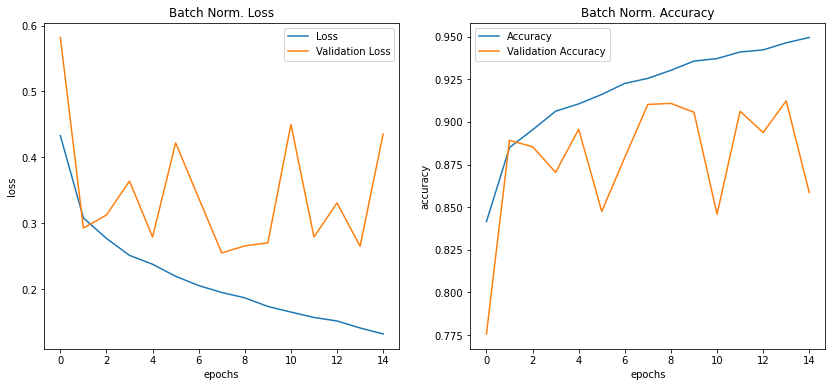

In [78]:
name = 'Batch Norm.'
hist_df = pd.DataFrame(conv3_hist.history)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(hist_df.index, hist_df.loss, label='Loss')
ax[0].plot(hist_df.index, hist_df.val_loss, label='Validation Loss')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epochs')
ax[0].set_title(f'{name} Loss')
ax[0].legend()
ax[1].plot(hist_df.index, hist_df.accuracy, label='Accuracy')
ax[1].plot(hist_df.index, hist_df.val_accuracy, label='Validation Accuracy')
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_title(f'{name} Accuracy')
ax[1].legend()
plt.show()

In [69]:
model_performance = conv3.evaluate(xtest, ytest_cat.reshape(len(ytest_cat), 1, 1, 10))
print(f'Test Crossentropy Loss: {model_performance[0]}, Test Accuracy: {model_performance[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.4762 - accuracy: 0.8572
Test Crossentropy Loss: 0.47623735666275024, Test Accuracy: 0.857200026512146


**Observation, comparison with Dropout:**

**Answer**: Using batch normalization with the MNIST dataset does not seem to improve the overfitting problem often found with neural networks. We see some of the telltale signs above of increasing validation loss and a much lower validation accuracy than train accuracy. For this situation, dropout does seem to have the upper hand when it comes to reducing overfitting. The sporadic nature of the validation loss definitely scares me away a little bit, especially compared to my dropout model that has much less sporadic loss values and generally follows a convergent curve.